## 🚢 Titanic Survival Prediction – Grid Search Optimization & Reproducible ML Pipeline

This project tackles the **Titanic - Machine Learning from Disaster** challenge using a **Random Forest Classifier** and **Grid Search** for hyperparameter tuning.  
The goal is to **predict passenger survival** based on engineered features and robust preprocessing techniques.

---

### 📦 Dataset Overview

- **Training Set**: `train_processed`  
- **Test Set**: `test_processed`

The dataset includes the following features:

- **Pclass** – Passenger class (1st, 2nd, 3rd)  
- **Sex** – Gender of the passenger  
- **Age** – Age (with missing values handled and optionally binned into age groups)  
- **SibSp** – Number of siblings/spouses aboard  
- **Parch** – Number of parents/children aboard  
- **Fare** – Ticket fare  
- **Embarked** – Port of embarkation (`C`, `Q`, `S`)  
- **FamilySize** – Engineered feature: `SibSp + Parch + 1`  
- **Alone** – Binary feature: `1` if alone, `0` otherwise  
- **Age Group Indicators** – One-hot encoded categories such as `AgeGroup_Child`, `AgeGroup_Adult`, etc.

These features are processed to ensure consistency, handle missing data, and improve model learning.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Add 'Survived' to test set temporarily for consistency
test_data['Survived'] = -1  # dummy value

# Combine for preprocessing
df = pd.concat([df, test_data], ignore_index=True)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,-0.058060,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.760044,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,-1.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df.describe(include = "O")

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
# Count of null cabins by Pclass
null_cabins = df[df['Cabin'].isnull()].groupby('Pclass').size()

# Count of total passengers by Pclass
total_by_class = df.groupby('Pclass').size()

# Combine both for percentage
cabin_summary = pd.DataFrame({
    'TotalPassengers': total_by_class,
    'MissingCabins': null_cabins
})

cabin_summary['MissingPercentage'] = (cabin_summary['MissingCabins'] / cabin_summary['TotalPassengers']) * 100
print(cabin_summary)

        TotalPassengers  MissingCabins  MissingPercentage
Pclass                                                   
1                   323             67          20.743034
2                   277            254          91.696751
3                   709            693          97.743300


In [13]:
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else np.nan)
df = df.drop(['Cabin','Ticket','Name'], axis = 1)


In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,male,22.0,1,0,7.2500,S,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,NaN


In [15]:
def fill_missing_deck_and_fare(df: pd.DataFrame) -> pd.DataFrame:
    # Step 1: Extract Deck from Cabin (if not already done)
    ###df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')

    # Step 2: Compute median Fare by Deck (only from rows with known Deck and Fare)
    fare_by_deck = df[df['Deck'].notna() & df['Fare'].notna()].groupby('Deck')['Fare'].median()

    # Step 3A: Fill missing Deck using Fare
    def infer_deck_from_fare(fare):
        if pd.isna(fare):
            return np.nan
        return (fare_by_deck - fare).abs().idxmin()

    df['Deck'] = df.apply(
        lambda row: infer_deck_from_fare(row['Fare']) if pd.isna(row['Deck']) else row['Deck'],
        axis=1
    )

    # Step 3B: Fill missing Fare using Deck
    df['Fare'] = df.apply(
        lambda row: fare_by_deck[row['Deck']] if pd.isna(row['Fare']) and row['Deck'] in fare_by_deck else row['Fare'],
        axis=1
    )

    return df

In [16]:
df = fill_missing_deck_and_fare(df)

In [17]:
fare_by_deck = df.groupby('Deck')['Fare'].median().sort_values()
print(fare_by_deck)

# Only rows with known decks
known = df[df['Deck'].notna()]
print(known)

Deck
F     7.89580
G    19.50000
A    27.73540
T    39.64375
D    48.30210
E    56.49580
B    76.17500
C    98.21250
Name: Fare, dtype: float64
      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
0               1         0       3    male  22.0      1      0    7.2500   
1               2         1       1  female  38.0      1      0   71.2833   
2               3         1       3  female  26.0      0      0    7.9250   
3               4         1       1  female  35.0      1      0   53.1000   
4               5         0       3    male  35.0      0      0    8.0500   
...           ...       ...     ...     ...   ...    ...    ...       ...   
1304         1305        -1       3    male   NaN      0      0    8.0500   
1305         1306        -1       1  female  39.0      0      0  108.9000   
1306         1307        -1       3    male  38.5      0      0    7.2500   
1307         1308        -1       3    male   NaN      0      0    8.0500   
1308     

In [18]:
correlation_matrix = df.corr(numeric_only=True)

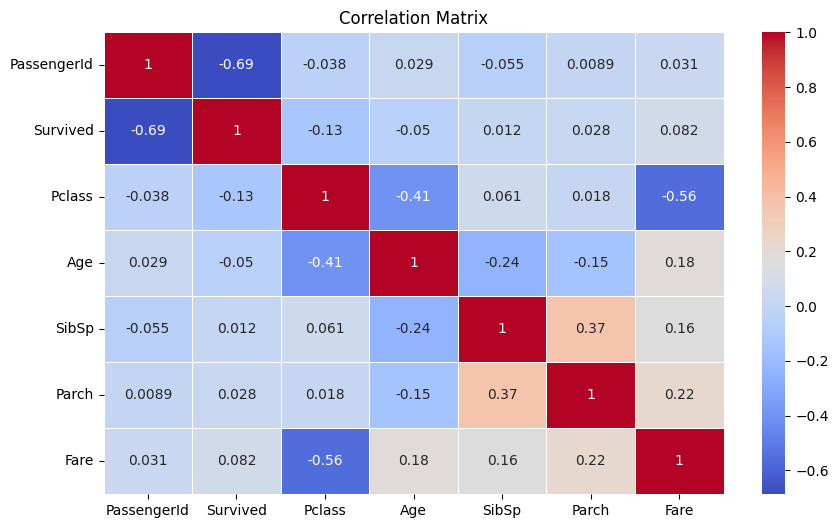

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

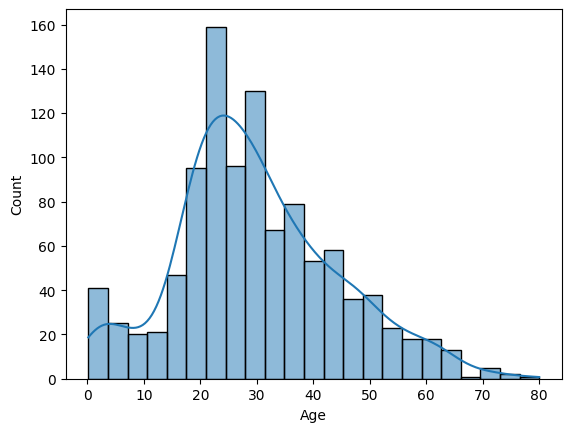

In [20]:
sns.histplot(df['Age'].dropna(), kde = True)
plt.show()

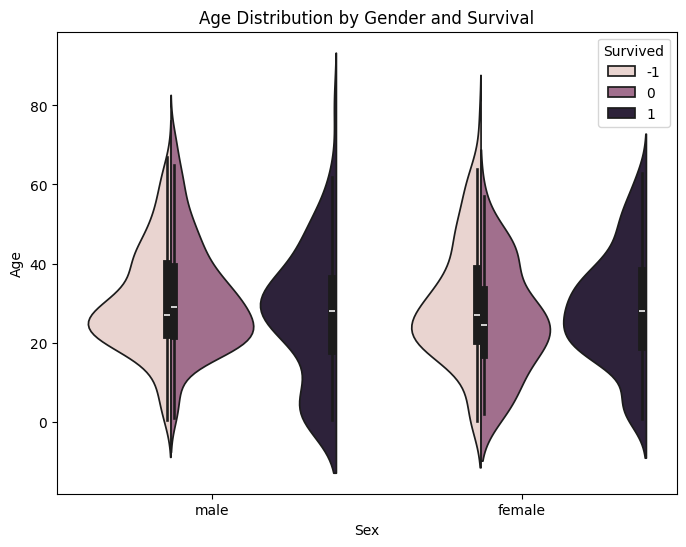

In [21]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)
plt.title("Age Distribution by Gender and Survival")
plt.show()

In [22]:
from scipy.stats.mstats import winsorize
df['Age'] = winsorize(df['Age'], limits = [0,0.20])

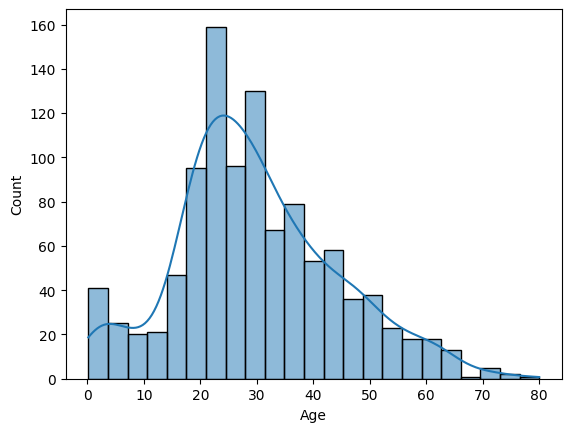

In [23]:
sns.histplot(df['Age'].dropna(), kde = True)
plt.show()

In [24]:
##from sklearn.impute import KNNImputer

In [25]:
import warnings
warnings.filterwarnings("ignore", message=".*'partition' will ignore the 'mask'.*")
##knn_imputer = KNNImputer(n_neighbors = 5)
##df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
##df['Ticket'] = df['Ticket'].str.extract(r'(\d+)$')
##df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
##df['Age'] = knn_imputer.fit_transform(df)
##df['Deck'] = df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else np.nan)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])
df['FamilySize'] = df['SibSp'] + df['Parch']
df['Alone'] = df['FamilySize'].apply(lambda x: 1 if x == 0 else 0)


In [26]:
bins = [0, 5, 12, 18, 59, 100]
labels = ['Infant', 'Child', 'Teenager', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [27]:
encoded_df = pd.get_dummies(df, columns = ['Sex','Embarked','AgeGroup','Deck'], drop_first = True)

encoded_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone,Sex_male,...,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_Senior,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,3,22.0,1,0,7.2500,1,0,True,...,False,True,False,False,False,False,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,1,0,False,...,False,True,False,False,True,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,0,1,False,...,False,True,False,False,False,False,False,True,False,False
3,4,1,1,35.0,1,0,53.1000,1,0,False,...,False,True,False,False,True,False,False,False,False,False
4,5,0,3,35.0,0,0,8.0500,0,1,True,...,False,True,False,False,False,False,False,True,False,False


In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Alone,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,F,1,0,Adult
1,2,1,1,female,38.0,1,0,71.2833,C,C,1,0,Adult
2,3,1,3,female,26.0,0,0,7.9250,S,F,0,1,Adult
3,4,1,1,female,35.0,1,0,53.1000,S,C,1,0,Adult
4,5,0,3,male,35.0,0,0,8.0500,S,F,0,1,Adult


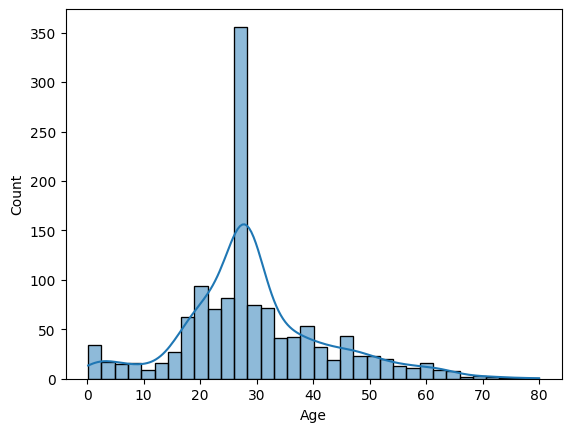

In [29]:
sns.histplot(encoded_df['Age'].dropna(), kde = True)
plt.show()

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,-0.058060,2.294882,29.503186,0.498854,0.385027,33.276193,0.883881,0.603514
std,378.020061,0.760044,0.837836,12.905241,1.041658,0.865560,51.743584,1.583639,0.489354
min,1.000000,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,-1.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,10.000000,1.000000


In [31]:
# Convert all bool columns to int (0/1)
bool_cols = encoded_df.select_dtypes(include='bool').columns
encoded_df[bool_cols] = encoded_df[bool_cols].astype(int)

In [32]:
# Drop rows with any null (NaN) values
df_cleaned = encoded_df.dropna()

# Optional: reset index if needed
df_cleaned = df_cleaned.reset_index(drop=True)

In [33]:
df_cleaned.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Age                  0
SibSp                0
Parch                0
Fare                 0
FamilySize           0
Alone                0
Sex_male             0
Embarked_Q           0
Embarked_S           0
AgeGroup_Child       0
AgeGroup_Teenager    0
AgeGroup_Adult       0
AgeGroup_Senior      0
Deck_B               0
Deck_C               0
Deck_D               0
Deck_E               0
Deck_F               0
Deck_G               0
Deck_T               0
dtype: int64

In [34]:
# Separate back
train_processed = df_cleaned[df_cleaned['Survived'] != -1]
test_processed = df_cleaned[df_cleaned['Survived'] == -1].drop('Survived', axis=1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming `df` is preprocessed
X_train = train_processed.drop(['Survived', 'PassengerId'], axis=1)
y_train = train_processed['Survived']

###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=params,
    cv=cv,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,  # shows progress
    n_jobs=-1   # uses all CPU cores
)

grid_search.fit(X_train, y_train)

X_test = test_processed.drop(['PassengerId'], axis=1)

best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)
## print("Accuracy:", accuracy_score(y_train, preds))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [37]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.840631473228297


In [38]:
output = pd.DataFrame({'PassengerId': test_processed.PassengerId, 'Survived': preds})
output.to_csv('gridsearch_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [39]:
train_processed.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone,Sex_male,...,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_Senior,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602,0.602694,0.647587,...,0.078563,0.814815,0.029181,0.070707,0.077441,0.048260,0.048260,0.500561,0.117845,0.020202
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615,0.477990,...,0.269207,0.388666,0.168407,0.256479,0.267440,0.214436,0.214436,0.500281,0.322606,0.140770
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
test_processed.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone,Sex_male,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_Senior,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.805024,0.447368,0.392344,35.561214,0.839713,0.605263,0.636364,0.110048,...,0.069378,0.837321,0.033493,0.059809,0.093301,0.040670,0.040670,0.514354,0.119617,0.019139
std,120.810458,0.841838,12.667969,0.896760,0.981429,55.856789,1.519072,0.489380,0.481622,0.313324,...,0.254400,0.369515,0.180135,0.237416,0.291203,0.197761,0.197761,0.500393,0.324902,0.137177
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from joblib import dump
# Save
dump(best_model, 'titanic_model.joblib')

['titanic_model.joblib']